In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
img = Image.open("img001.jpeg")
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=276x182 at 0x109404950>


In [3]:
data = np.array(img)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(182, 276, 3)


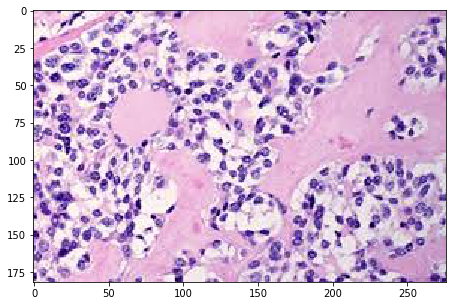

In [4]:
fig=plt.figure(figsize=(16,5))
ax1=fig.add_subplot(111)
pl=ax1.imshow(data)

In [5]:
R=data[:,:,0]
G=data[:,:,1]
B=data[:,:,2]

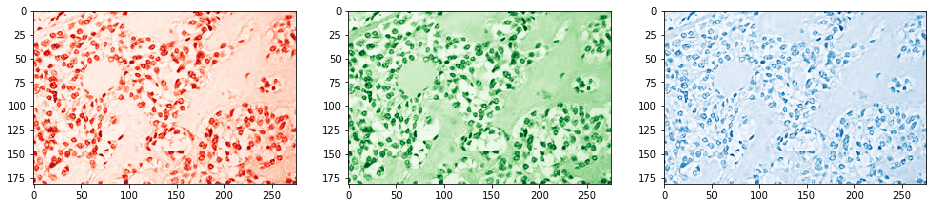

In [7]:
fig=plt.figure(figsize=(16,5))
ax1=fig.add_subplot(131)
cmap1 = plt.cm.get_cmap('Reds_r')
pl=ax1.imshow(R,cmap=cmap1)
ax2=fig.add_subplot(132)
cmap2 = plt.cm.get_cmap('Greens_r')
pl=ax2.imshow(G,cmap=cmap2)
ax3=fig.add_subplot(133)
cmap3 = plt.cm.get_cmap('Blues_r')
pl=ax3.imshow(B,cmap3)
plt.show()

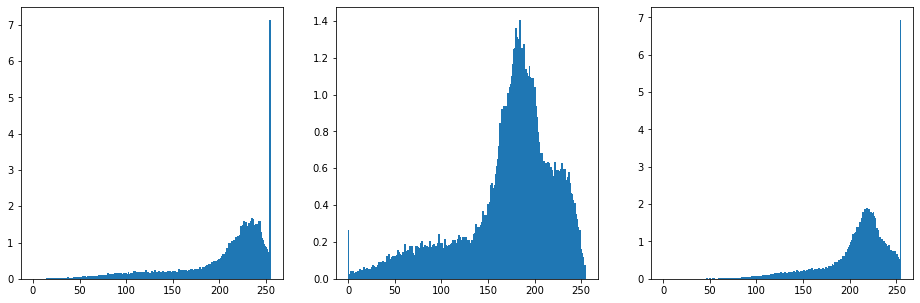

In [8]:
histo1=np.histogram(R, bins=np.linspace(0, 255,256))
amplitudes1=100*histo1[0]/histo1[0].sum()
bins1=(histo1[1][1:]+histo1[1][:-1])/2
histo2=np.histogram(G, bins=np.linspace(0, 255,256))
amplitudes2=100*histo2[0]/histo2[0].sum()
bins2=(histo2[1][1:]+histo2[1][:-1])/2
histo3=np.histogram(B, bins=np.linspace(0, 255,256))
amplitudes3=100*histo3[0]/histo3[0].sum()
bins3=(histo3[1][1:]+histo3[1][:-1])/2

fig=plt.figure(figsize=(16,5))
ax1=fig.add_subplot(131)
pl=ax1.bar(bins1,amplitudes1,width=2)
ax2=fig.add_subplot(132)
p2=ax2.bar(bins2,amplitudes2,width=2)
ax3=fig.add_subplot(133)
p3=ax3.bar(bins3,amplitudes3,width=2)

plt.show()


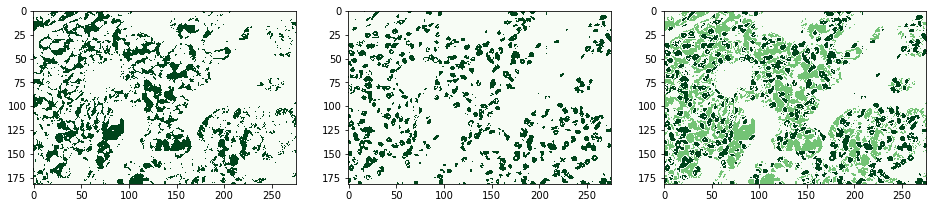

In [42]:
fig=plt.figure(figsize=(16,5))
cmap1 = plt.cm.get_cmap('Greens')
ax1=fig.add_subplot(131)
G1=1*(G>210)*(G<255)
pl=ax1.imshow(G1,cmap=cmap1)
ax2=fig.add_subplot(132)
G2=2*(G<120)
pl=ax2.imshow(G2,cmap=cmap1)
ax3=fig.add_subplot(133)
G3=G1+G2
pl=ax3.imshow(G3,cmap=cmap1)
plt.show()

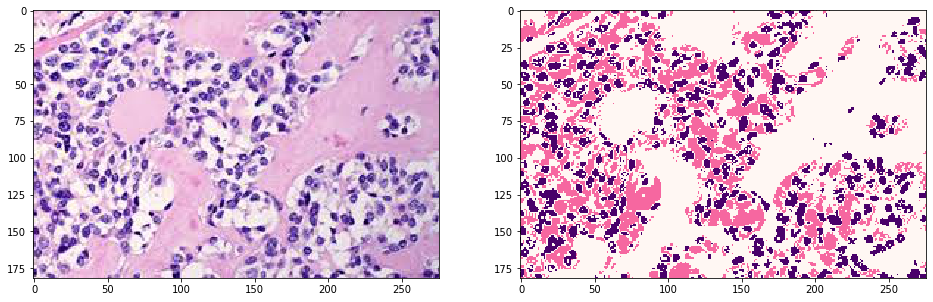

In [48]:
fig=plt.figure(figsize=(16,5))
cmap1 = plt.cm.get_cmap('RdPu')
ax1=fig.add_subplot(121)
pl=ax1.imshow(data)
ax2=fig.add_subplot(122)
pl=ax2.imshow(G3,cmap=cmap1)
plt.show()

In [67]:
data_downsampling = data[::2, ::2]
print('The data downsampled image has {} x {} voxels'.format(
    data_downsampling.shape[0], data_downsampling.shape[1]))

G3_downsampling = G3[::2, ::2]
print('The G3 downsampled image has {} x {} voxels'.format(
    G3_downsampling.shape[0], G3_downsampling.shape[1]))

The data downsampled image has 91 x 138 voxels
The G3 downsampled image has 91 x 138 voxels


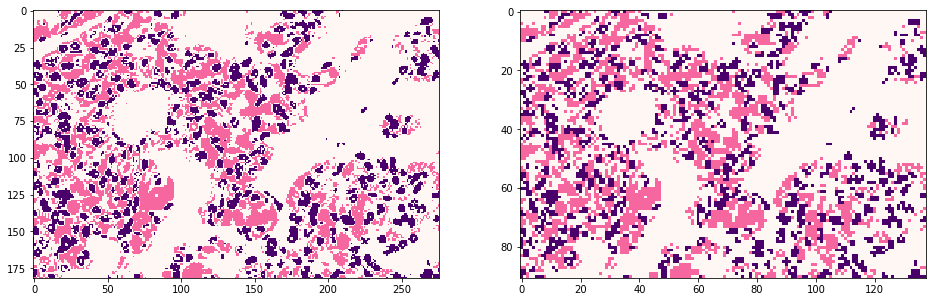

In [60]:
fig=plt.figure(figsize=(16,5))
cmap1 = plt.cm.get_cmap('RdPu')
ax1=fig.add_subplot(121)
pl=ax1.imshow(G3,cmap=cmap1)
ax2=fig.add_subplot(122)
pl=ax2.imshow(G3_downsampling,cmap=cmap1)
plt.show()

In [61]:
print(G3_downsampling)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 0 ... 2 0 0]
 [2 2 1 ... 2 0 0]
 [2 0 1 ... 2 2 2]]


In [66]:
np.savetxt("test.dat",[[i,j,val] for j,row in enumerate(G3_downsampling) for i,val in enumerate(row) ])